In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

Task 9

In [2]:
def N(x,j,k, t):
    # x ... positions
    # t ... knots (Stützstellen)
    # j ... jte B-Spline Basis function
    # k ... degree of B-Spline
        if k == 1:
            if t[j] <= x < t[j+1]:
                return 1
            else:
                return 0
        else:
            return (x-t[j])/(t[j+k-1]-t[j] + 0.0000001 )*N(x,j,k-1,t) + (t[j+k]-x)/(t[j+k]-t[j + 1] + 0.00000001)*N(x,j+1,k-1,t)


Basis functions for knots $t_{j} = j$

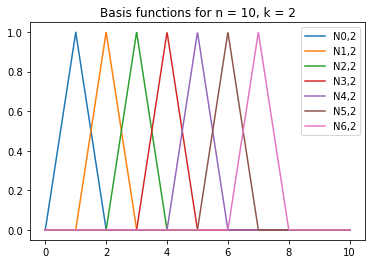

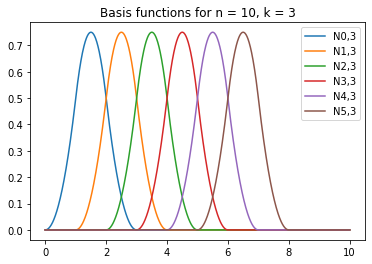

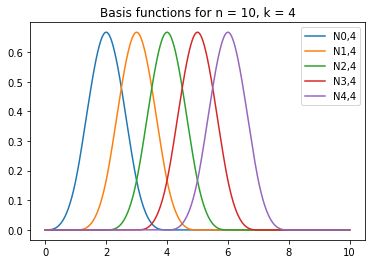

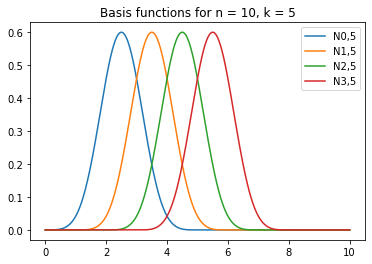

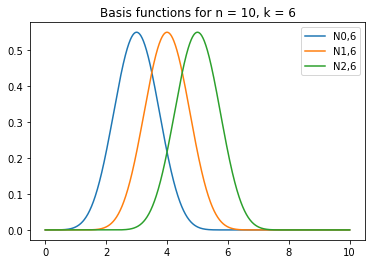

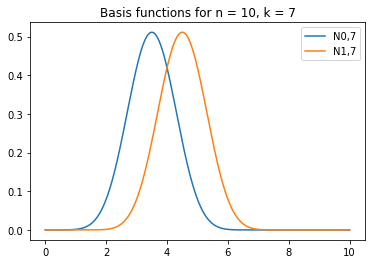

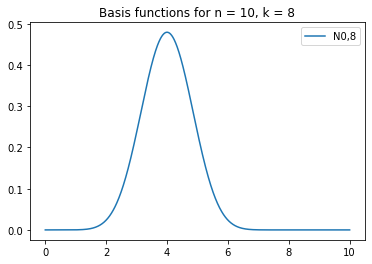

In [3]:
xs = np.linspace(0, 10, 1000)
ys = np.zeros(len(xs))

n = 10

ks = [k for k in range(2, n - 1)]

sum_1 = np.zeros([len(xs), len(ks)])

for k in ks:
    js = [j for j in range(0, n - k - 1)]
    ts = [t for t in range(0, n + 1)]
    for j in js:
        for i in range(0, len(xs)):
            y = N(xs[i], j, k, ts)
            ys[i] = y
        sum_1[:, k - 2] += ys
        plt.plot(xs, ys, label="N" + str(j) + "," + str(k))
    plt.title("Basis functions for n = " + str(n) + ", k = " + str(k))
    plt.legend()
    plt.show()

Basis functions for using $k$ multiple knots at both ends, i.e $t_{0} = ... = t_{k-1}$ and $t_{n-k-1} = ... = t_{n}$
Ts starts with 0 and

t:  [ 0.  0.  2.  3.  4.  5.  6.  7.  8. 10. 10.]
t:  [ 0.  0.  0.  3.  4.  5.  6.  7. 10. 10. 10.]
t:  [ 0.  0.  0.  0.  4.  5.  6. 10. 10. 10. 10.]
t:  [ 0.  0.  0.  0.  0.  5. 10. 10. 10. 10. 10.]
t:  [ 0.  0.  0.  0.  0. 10. 10. 10. 10. 10. 10.]
t:  [ 0.  0.  0.  0. 10. 10. 10. 10. 10. 10. 10.]
t:  [ 0.  0.  0. 10. 10. 10. 10. 10. 10. 10. 10.]


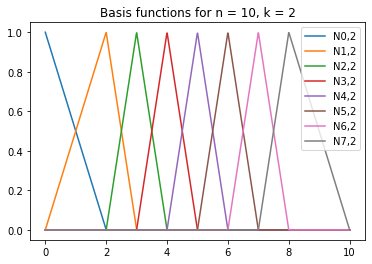

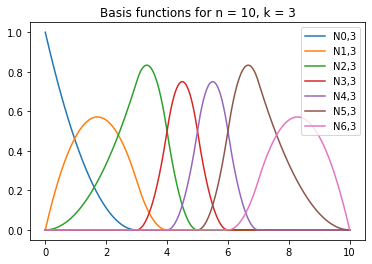

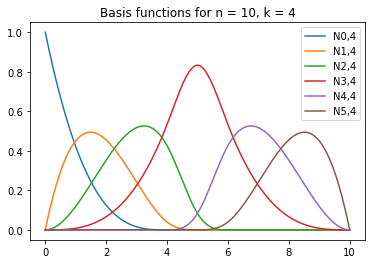

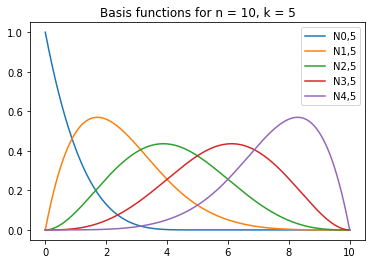

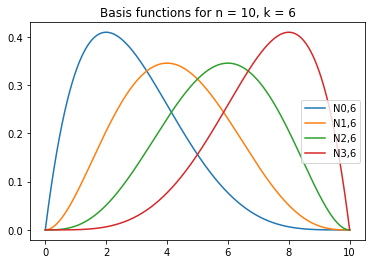

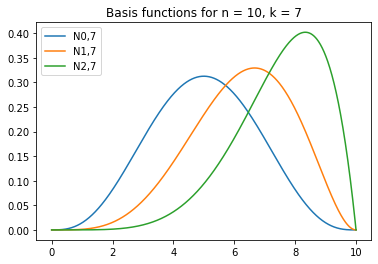

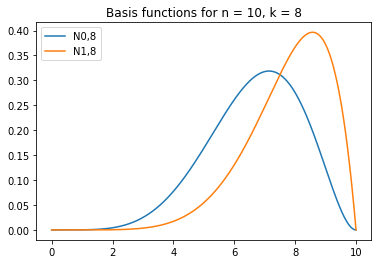

In [4]:
xs = np.linspace(0, 10, 1000)
ys = np.zeros(len(xs))
n = 10
ks = [k for k in range(2, n - 1)]

sum_2 = np.zeros([len(xs), len(ks)])

for k in ks:
    js = [j for j in range(0, n - k)]
    ts = np.zeros(n + 1)
    for i in range(0, n + 1):
        if i >= n - k + 1:
            ts[i] = n
        elif i <= k - 1:
            ts[i] = 0
        else:
            ts[i] = i

    print("t: ", ts)

    for j in js:
        for i in range(0, len(xs)):
            y = N(xs[i], j, k, ts)
            ys[i] = y
        sum_2[:, k - 2] += ys
        plt.plot(xs, ys, label="N" + str(j) + "," + str(k))

    plt.title("Basis functions for n = " + str(n) + ", k = " + str(k))
    plt.legend()
    plt.show()

Plot $\sum_{j=0}^{n} N_{j,k}$

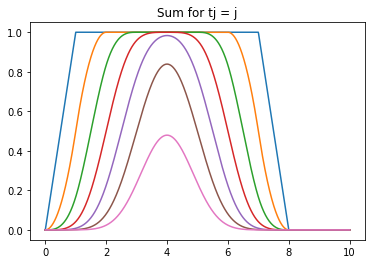

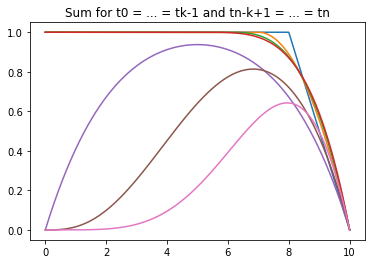

In [5]:
for k in range(2, n - 1):
    plt.plot(xs, sum_1[:, k - 2], label="Sum for " + str(k) )
plt.title("Sum for tj = j")
plt.show()

for k in range(2, n - 1):
    plt.plot(xs, sum_2[:, k - 2], label="Sum for " + str(k) )
plt.title("Sum for t0 = ... = tk-1 and tn-k+1 = ... = tn")
plt.show()

How do basis functions look like for multiple internal knots

[ 0.  1.  2.  3.  5.  5.  6.  7.  8.  9. 10.]
[ 0.  1.  2.  3.  5.  5.  6.  7.  8.  9. 10.]
[ 0.  1.  2.  5.  5.  5.  6.  7.  8.  9. 10.]
[ 0.  1.  2.  5.  5.  5.  5.  7.  8.  9. 10.]
[ 0.  1.  5.  5.  5.  5.  5.  7.  8.  9. 10.]
[ 0.  1.  5.  5.  5.  5.  5.  5.  8.  9. 10.]
[ 0.  5.  5.  5.  5.  5.  5.  5.  8.  9. 10.]
[ 0.  5.  5.  5.  5.  5.  5.  5.  5.  9. 10.]


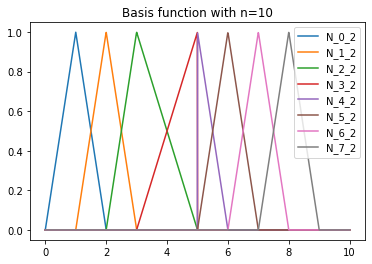

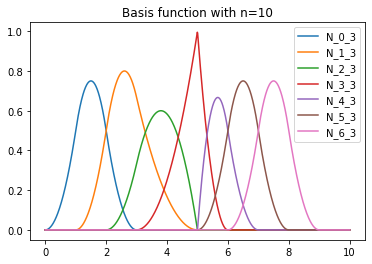

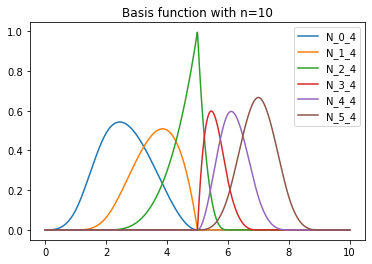

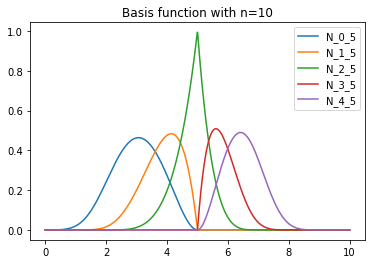

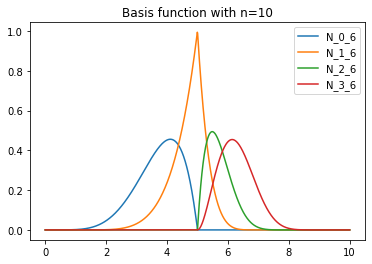

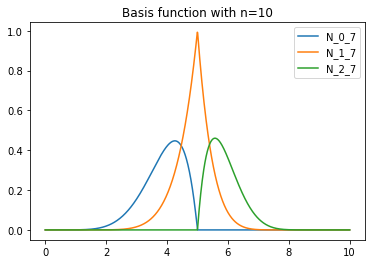

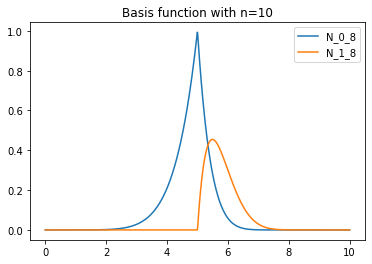

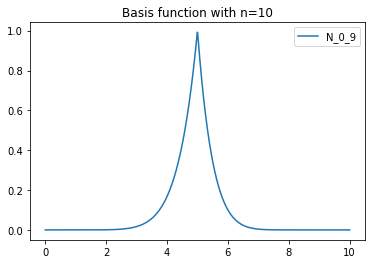

In [6]:
ts = np.linspace(0,10,11)
y3 = np.zeros(len(xs))
for k in range(2,len(ts) - 1):
    ts = np.linspace(0,10,11)
    ts[5-int(k/2):5+int((k+1)/2)-1] = 5
    print(str(ts))
    for j in range(len(ts)-k-1):
        plt.figure(k)
        plt.title("Basis function with n=" +str(n))
        for i in range(len(xs)):
            y3[i] = N(xs[i],j,k,ts)
        plt.plot(xs,y3,label = "N_"+str(j)+"_"+str(k))
        plt.legend()

Task 10

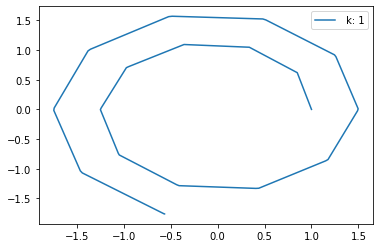

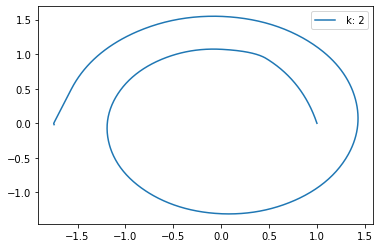

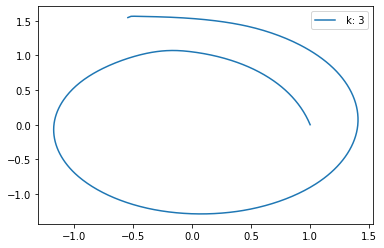

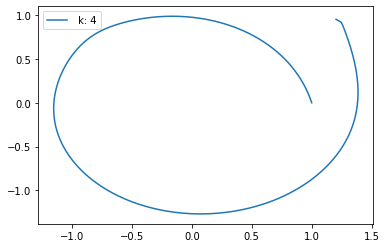

In [7]:
def de_Boor(x, t, p, k):

    """
    x ... Position
    t ... Stützstellen
    p ... Kontrollpunkte
    k ... B-Spline Grad
    """

    m = -1
    for i in range(len(t)-k-1):
        if t[i] <= x:
            m = i
    if m<0:
        raise ValueError("x={0} not in internal [{1},{2}]".format(x, t[0], t[-1]))

    c = [p[j + m - k] for j in range(0, k+1)]
    d = np.copy(c)

    for r in range(1, k+1):
        for j in range(k, r-1, -1):
            alpha = (x - t[j+m-k]) / (t[j+1+m-r] - t[j+m-k] + 2**(-10))
            d[j] = (1.0 - alpha) * d[j-1] + alpha * d[j]

    return d[k]

def gamma(t):
    return [(t + 1) * np.cos(4 * np.pi * t), (t + 1) * np.sin(4 * np.pi * t)]

xs = np.linspace(0, 1,1000)

n = 20

p = [gamma(i / n) for i in range(0, n + 1)]

for k in [1, 2, 3, 4]:
    y0 = []
    y1 = []

    t = np.linspace(0, 1, n + 1)
    t[0:k+1] = 0
    t[n-k:n] = n

    for x in xs:
        y = de_Boor(x, t, p, k)
        y0.append(y[0])
        y1.append(y[1])

    plt.plot(y0, y1, label = " k: " + str(k))
    plt.legend()
    plt.show()


Reference solution using  scipy.interpolate.splev

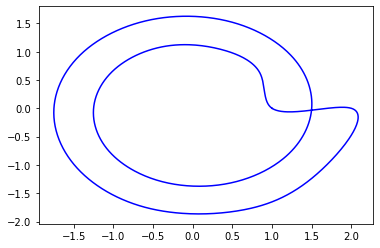

In [8]:
p_0 = []
p_1 = []
for pi in p:
    p_0.append(pi[0])
    p_1.append(pi[1])

# append the starting x,y coordinates
p_0 = np.r_[p_0, p_0[0]]
p_1 = np.r_[p_1, p_1[0]]

tck, u = interpolate.splprep([p_0, p_1], s=0, per=True)

# evaluate the spline fits for 1000 evenly spaced distance values
xi, yi = interpolate.splev(np.linspace(0, 1, 1000), tck)

# plot the result
fig, ax = plt.subplots(1, 1)
ax.plot(xi, yi, '-b')

plt.show()